# Problem Set #4
## Name: Sahithi N Adari
### Date: 04/19/2021

In [1]:
import pandas as pd 
import numpy as np
import csv

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
# import seaborn as sns

## Part 1

### Question 1

In [2]:
# Setting the conditional probabilites for A 
a_1_positive = 3/5
a_0_positive = 2/5 
a_1_negative = 2/5
a_0_negative = 3/5 

# Setting the conditional probabilites for B 
b_1_positive = 1/5
b_0_positive = 4/5 
b_1_negative = 2/5
b_0_negative = 3/5 

# Setting the conditional probabilites for C 
c_1_positive = 4/5
c_0_positive = 1/5 
c_1_negative = 1
c_0_negative = 0 

# Printing the results
print('The conditional probabilites are:', {'P(A = 1|+)':a_1_positive,
                                            'P(A = 0|+)':a_0_positive, 
                                            'P(A = 1|-)':a_1_negative, 
                                            'P(A = 0|-)':a_0_negative, 
                                            'P(B = 1|+)':b_1_positive, 
                                            'P(B = 0|+)':b_0_positive, 
                                            'P(B = 1|-)':b_1_negative, 
                                            'P(B = 0|-)':b_0_negative, 
                                            'P(C = 1|+)':c_1_positive, 
                                            'P(C = 0|+)':c_0_positive, 
                                            'P(C = 1|-)':c_1_negative, 
                                            'P(C = 0|-)':c_0_negative})

The conditional probabilites are: {'P(A = 1|+)': 0.6, 'P(A = 0|+)': 0.4, 'P(A = 1|-)': 0.4, 'P(A = 0|-)': 0.6, 'P(B = 1|+)': 0.2, 'P(B = 0|+)': 0.8, 'P(B = 1|-)': 0.4, 'P(B = 0|-)': 0.6, 'P(C = 1|+)': 0.8, 'P(C = 0|+)': 0.2, 'P(C = 1|-)': 1, 'P(C = 0|-)': 0}


In [3]:
# Calcuating the class-conditional probabilites for A
a_positive = a_1_positive * a_0_positive
a_negative = a_1_negative * a_0_negative

# Calcuating the class-conditional probabilites for B
b_positive = b_1_positive * b_0_positive
b_negative = b_1_negative * b_0_negative

# Calcuating the class-conditional probabilites for A
c_positive = c_1_positive * c_0_positive
c_negative = c_1_negative * c_0_negative

# Printing the results
print('The conditional probabilites are:', {'P(A|+)': round(a_positive, 4),
                                            'P(A|-)': round(a_negative, 4), 
                                            'P(B|+)': round(b_positive, 4),
                                            'P(B|-)': round(b_negative, 4),
                                            'P(C|+)': round(c_positive, 4),
                                            'P(C|-)': round(c_negative, 4)})

The conditional probabilites are: {'P(A|+)': 0.24, 'P(A|-)': 0.24, 'P(B|+)': 0.16, 'P(B|-)': 0.24, 'P(C|+)': 0.16, 'P(C|-)': 0}


### Question 2

In [4]:
# Setting the prior probabilites
positive = 0.5
negative = 0.5 

# Calculating the class-conditional probabilites for A = 0, B = 1, C = 0
x_positive = a_0_positive * b_1_positive * c_0_positive
x_negative = a_0_negative * b_1_negative * c_0_negative

# Calculating the posterior probabilities 
positive_x = ((positive * x_positive)/0.1)
negative_x = ((negative * x_negative)/0.1)

# Printing out the posterior probabilities 
print({'P(+|x)':positive_x, 'P(-|x)':negative_x})

{'P(+|x)': 0.08000000000000002, 'P(-|x)': 0.0}


Because $P(+|x) > P(-|x), P(A = 0, B = 1, C = 0)$ gets classified as $+$.

### Question 3

In [5]:
# Calculating the conditional probabilites for A (laplace)
a_1_positive_laplace = (3+1)/(5+2)
a_0_positive_laplace = (2+1)/(5+2) 
a_1_negative_laplace = (2+1)/(5+2)
a_0_negative_laplace = (3+1)/(5+2)

# Calculating the conditional probabilites for B (laplace)
b_1_positive_laplace = (1+1)/(5+2)
b_0_positive_laplace = (4+1)/(5+2)
b_1_negative_laplace = (2+1)/(5+2)
b_0_negative_laplace = (3+1)/(5+2)

# Calculating the conditional probabilites for C (laplace)
c_1_positive_laplace = (4+1)/(5+2)
c_0_positive_laplace = (1+1)/(5+2)
c_1_negative_laplace = (5+1)/(5+2)
c_0_negative_laplace = (0+1)/(5+2)

# Printing the results
print('Using the Laplace estimate, the conditional probabilites are:', {'P(A = 1|+)': round(a_1_positive_laplace, 4),
                                            'P(A = 0|+)': round(a_0_positive_laplace, 4),
                                            'P(A = 1|-)': round(a_1_negative_laplace, 4), 
                                            'P(A = 0|-)': round(a_0_negative_laplace, 4),
                                            'P(B = 1|+)': round(b_1_positive_laplace, 4),
                                            'P(B = 0|+)': round(b_0_positive_laplace, 4),
                                            'P(B = 1|-)': round(b_1_negative_laplace, 4),
                                            'P(B = 0|-)': round(b_0_negative_laplace, 4),
                                            'P(C = 1|+)': round(c_1_positive_laplace, 4),
                                            'P(C = 0|+)': round(c_0_positive_laplace, 4),
                                            'P(C = 1|-)': round(c_1_negative_laplace, 4),
                                            'P(C = 0|-)': round(c_0_negative_laplace, 4)})

Using the Laplace estimate, the conditional probabilites are: {'P(A = 1|+)': 0.5714, 'P(A = 0|+)': 0.4286, 'P(A = 1|-)': 0.4286, 'P(A = 0|-)': 0.5714, 'P(B = 1|+)': 0.2857, 'P(B = 0|+)': 0.7143, 'P(B = 1|-)': 0.4286, 'P(B = 0|-)': 0.5714, 'P(C = 1|+)': 0.7143, 'P(C = 0|+)': 0.2857, 'P(C = 1|-)': 0.8571, 'P(C = 0|-)': 0.1429}


### Question 4

In [6]:
# Calculating the class-conditional probabilites for A = 0, B = 1, C = 0 (laplace)
x_positive_laplace = a_0_positive_laplace * b_1_positive_laplace * c_0_positive_laplace
x_negative_laplace = a_0_negative_laplace * b_1_negative_laplace * c_0_negative_laplace

# Calculating the posterior probabilities 
positive_x_laplace = ((positive * x_positive_laplace)/0.1)
negative_x_laplace = ((negative * x_negative_laplace)/0.1)

# Printing out the posterior probabilities 
print({'P(+|x)': positive_x_laplace, 'P(-|x)': negative_x_laplace})

{'P(+|x)': 0.17492711370262387, 'P(-|x)': 0.17492711370262387}


Because $P(+|x) = P(-|x)$ this means that there is equal probability that $P(A = 0, B = 1, C = 0)$ will be classified as $P(+)$ or $P(-)$.

### Question 5

Although Laplace outputted equal probabilities between the two classes, it is still a better method given that it is better equipped to deal with situations with a class-conditional probability of 0. 

Laplace avoids the problem of "vanishing" class-conditional probabilities, thereby, providing more robust estimates of posterior probabilities.

## Part 2

In [7]:
# Importing the data
fedreg = pd.read_csv('fed_register_agriculture.csv')

### Question 1

In [8]:
# Creating a target array
y = fedreg['agriculture']

# Creating a features array
X = fedreg['text']

### Question 2

In [9]:
# Generating a vectorizer that would generate a DTM with a minimum document frequency of 25
vect = TfidfVectorizer(stop_words='english', min_df = 25)

# Converting the text to DTM with TF-IDF weighting
dtm = vect.fit_transform(fedreg['text'])

# Determining the shape of the DTM
dtm.shape

(1268, 528)

The minimum document frequency of 25 directly impacts the number of attributes in a DTM. A higher minimum results in fewer attributes as the document threshold has increased; a lower minimum results in more attributes. In essence, a word has to be appear a minimum number of times before it is captured in the DTM.

### Question 3

In [10]:
# Generating a vectorizer that would generate a DTM with a minimum document frequency of 25, and excludes numbers
vect_num = TfidfVectorizer(stop_words='english', min_df = 25, token_pattern = r'(?u)\b[^\d\W]+\b')

# Converting the text to DTM with TF-IDF weighting
dtm_num = vect_num.fit_transform(X)

# Determining the shape of the DTM
dtm_num.shape

(1268, 512)

The DTM change shape as the number of attributes goes from 528 to 512. This means that there were 16 numbers in the original DTM that met the minimum document threshold.

### Question 4

In [11]:
# Converting vocabulary to dictionary of term indices
vect_num.vocabulary_
term_indices = {index: term for term, index in vect_num.vocabulary_.items()}

In [12]:
# Creating a list of column names from the term indices
colterms = [term_indices[i] for i in range(dtm_num.shape[1])]

In [13]:
# Creating a DTM dataframe
X = pd.DataFrame(dtm_num.toarray(), columns=colterms)

In [14]:
# Intializing the KNeighborsClassifier
mod = KNeighborsClassifier()

# Fitting the model
mod.fit(X, y)

KNeighborsClassifier()

In [15]:
# Splitting the validation into train_scores and test_scores
train_scores, test_scores = validation_curve(mod, X, y, 
                                             param_name = "n_neighbors", 
                                             param_range = np.arange(1, 11))

In [16]:
# Generating the means
train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

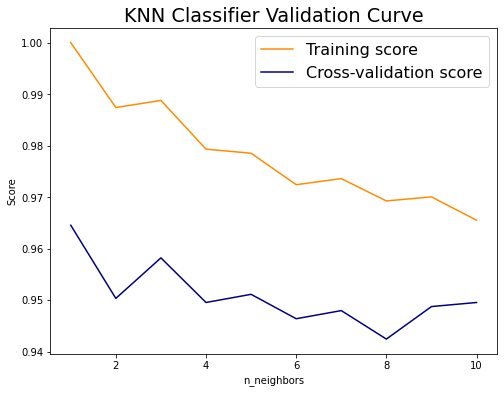

In [17]:
# Plotting the validation curve
fig = plt.figure(figsize = (8,6))

# Setting the range of x-axis values
param_range = np.arange(1, 11)

# Plotting the training and test mean 
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="navy")

# Globally setting the font size for readability
plt.rcParams['font.size'] = '16'

# Setting the title and axis labels
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('KNN Classifier Validation Curve')

# Showing the legend
plt.legend()

# Showing the plot
plt.show()

According to the above validation curve, $k$ = 1 would be the ideal value of $k$. Although there are always concerns that a low $k$ will result in overfitting the of data, this is not a concern here since we are working with a binary dataset.

### Question 5

#### Part A - KNN

In [18]:
# Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1994)

In [19]:
# Generating a KNN model with 2 neighbors 
knn = KNeighborsClassifier(n_neighbors=1)

# Training a model with CV of 5 on the test data
knn_scores = cross_val_score(knn, Xtest, ytest, cv=5)

# Printing the average mean accuracy
print('Average cross-validation score for KNN: {:.4f}'.format(knn_scores.mean()))

Average cross-validation score for KNN: 0.9528


#### Part B - Logistic Regression

In [20]:
# Generating a Logistic Regression model
log = LogisticRegression()

# Training a model with CV of 5 on the test data
log_scores = cross_val_score(log, Xtest, ytest, cv=5)

# Printing the average mean accuracy
print('Average cross-validation score for Logistic Regression: {:.4f}'.format(log_scores.mean()))

Average cross-validation score for Logistic Regression: 0.9487


#### Part C - Multinomial Naive Bayes

In [21]:
# Generating a Multinomial Naive Bayes model
mnb = MultinomialNB()

# Training a model with CV of 5 on the test data
mnb_scores = cross_val_score(mnb, Xtest, ytest, cv=5)

# Printing each score and averaging them to get the mean accuracy
print('Average cross-validation score for Multinomial Naive Bayes: {:.4f}'.format(mnb_scores.mean()))

Average cross-validation score for Multinomial Naive Bayes: 0.9488


### Question 6

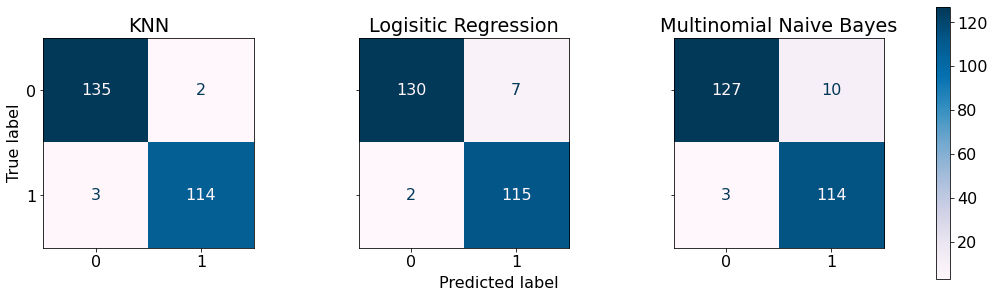

In [25]:
# Plotting all 3 confusion matrixes in one row 

# Creating a dictionary of classifiers
classifiers = {"KNN": KNeighborsClassifier(n_neighbors=1),
               "Logisitic Regression": LogisticRegression(),
               "Multinomial Naive Bayes": MultinomialNB()}

# Creating subplots
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

# Setting the x-axis as "Predicted Label"
f.text(0.4, 0.1, 'Predicted label', ha='left')

# Creating a for loop that would graph each confusion matrix in a subplot
for i, (key, classifier) in enumerate(classifiers.items()):
    plt.grid(False) # Removing grid lines
    y_pred = classifier.fit(Xtrain, ytrain).predict(Xtest) # Generating a prediction
    cf_matrix = confusion_matrix(ytest, y_pred) # Creating a confusion matrix from that prediction
    disp = ConfusionMatrixDisplay(cf_matrix) 
    disp.plot(ax = axes[i], cmap = 'PuBu') # Plotting the confusion matrix on the "Predicted Label" axis
    disp.ax_.set_title(key) 
    disp.im_.colorbar.remove() # Removing the colorbar for each plot
    disp.ax_.set_xlabel('') # Removing "Predicted Label" for each plot
    if i!=0: # Removing "True Label" for each plot except for the very first plot
        disp.ax_.set_ylabel('')

# Setting the colorbar for the entire figure
f.colorbar(disp.im_, ax=axes)

# Outputting the plot
plt.show()

When we compare the 3 confusion matrixes against each other, the values are relatively similar save for a few key differences. The Logistic Regression and Multinomial Naive Bayes are more likely to generate a Type 1 Error (false positive) whereas the KNN is more likely to generate a Type 2 Error (false negative).

KNN will have more issues with recall/sensitivity whereas Logistic Regression and Multinomial Naive Bayes will have issues with precision.

### Question 7

In [26]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Creating a model that would train the models and record the results
for (key, cls) in classifiers.items():
    yprob = cls.fit(Xtrain, ytrain).predict_proba(Xtest)[:,1] # Slicing the shape of 'yprob' into a 1-d array 
    
    fpr, tpr, _ = roc_curve(ytest, yprob) # Saving the first two values of the roc_curve array as 'fpr' and 'tpr', and not assigning a value to the third value of the roc_curve array 
    auc = roc_auc_score(ytest, yprob) # Generating the auc score and setting that value to 'auc'
    
    result_table = result_table.append({'classifiers': key,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Setting name of the classifiers as the index
result_table.set_index('classifiers', inplace=True)

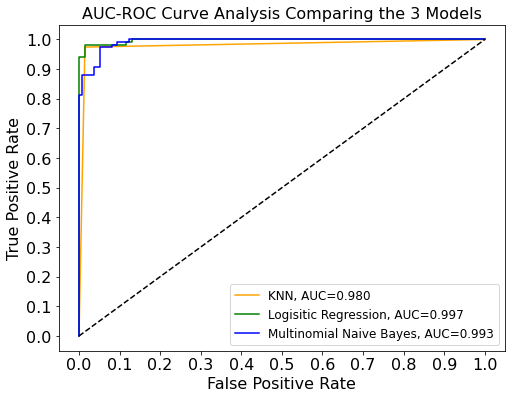

In [47]:
# Plotting the AUC-ROC for all 3 models
fig, ax = plt.subplots(figsize=(8,6))

# Setting the color of the plotlines
ax.set_prop_cycle(color=['orange', 'green', 'blue'])

# Creating a for loop that would plot the true positive rate against the false positive rate
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])) # Putting the AUC in the legend
    
# Creating the threshold line
plt.plot([0,1], [0,1], color='black', linestyle='--')

# Setting axis ticks
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.1, step=0.1))

# Labelling the plot
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title('AUC-ROC Curve Analysis Comparing the 3 Models', fontsize=16)

# Detailing the legend
plt.legend(prop={'size':12}, loc='lower right')

# Outputting the plot
plt.show()

When reviewing the mean test accuracy, confusion matrixes, as well as the ROC-AUC curves, the "best" model here is KNN. Although KNN's AUC is 0.01 worse than Logisitic Regression or Multinomial Naive Bayes, in the confusion matrix and the mean test accuracy section, KNN outperformed against the other 2 models. 

But, if I'm being entirely honest, I think all 3 models would work because the results are so close: there are only marginal differences between the models.